<a href="https://colab.research.google.com/github/vamsi-spec/ML-Project/blob/main/SMS_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv('/content/spam.csv', encoding='latin-1')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [41]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4904,spam,Warner Village 83118 C Colin Farrell in SWAT t...,NaN,NaN,NaN
4623,ham,Jus finish blowing my hair. U finish dinner al...,NaN,NaN,NaN
1071,spam,URGENT! We are trying to contact U. Todays dra...,NaN,NaN,NaN
3083,ham,Ok lor. I ned 2 go toa payoh 4 a while 2 retur...,NaN,NaN,NaN
4043,ham,"Yes, my reg is Ciao!",NaN,NaN,NaN


In [42]:
df.shape

(5572, 5)

In [43]:
#data cleaning
#EDA
#text pre-processing
#model building
#Evolution
#improvments

In [44]:
#DATA CLEANING
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [45]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
707,ham,Quite late lar... Ard 12 anyway i wun b drivin...
1565,ham,"The &lt;#&gt; g that i saw a few days ago, th..."
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5296,ham,Are u coming to the funeral home
1824,ham,Sent me ur email id soon


In [46]:
df.rename(columns={'v1':"target",'v2':"text"},inplace=True);
df.sample(5)

,target,text
1282,ham,Ever green quote ever told by Jerry in cartoon...
3919,spam,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...
4096,ham,i am going to bed now prin
3882,ham,Gumby's has a special where a &lt;#&gt; \ che...
3989,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...


In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
df['target'] = le.fit_transform(df['target'])

In [49]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df.isnull().sum()

,0
target,0
text,0


In [51]:
df.duplicated().sum()

np.int64(403)

In [54]:
df= df.drop_duplicates(keep='first')

In [56]:
df.duplicated().sum()
df.shape

(5169, 2)

In [57]:
#EDA
df['target'].value_counts()

,count
target,
0,4516
1,653


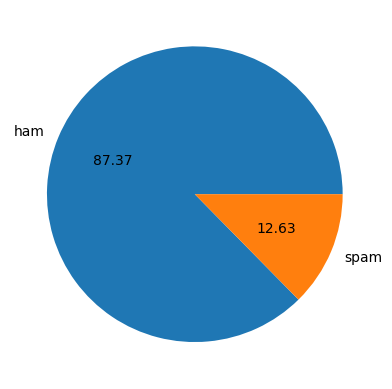

In [60]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [61]:
import nltk

In [63]:
!pip install nltk

In [62]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
df['num_char'] = df['text'].apply(len)

In [65]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [68]:
df['num_word'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [67]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [69]:
df.head()

,target,text,num_char,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [72]:
df['num_sent'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [73]:
df[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [74]:
df[df['target']==0][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [75]:
df[df['target']==1][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [76]:
import seaborn as sn


<Axes: xlabel='num_char', ylabel='Count'>

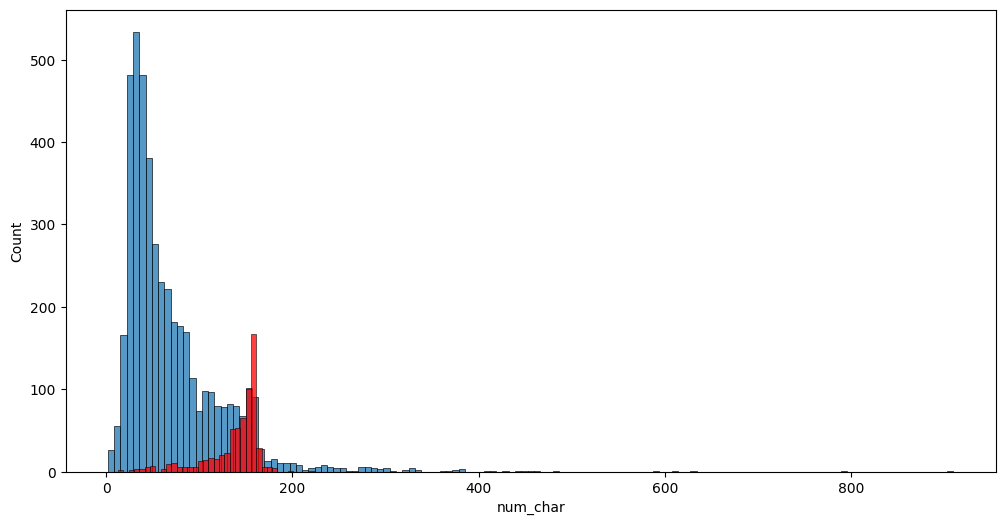

In [79]:
plt.figure(figsize=(12,6))
sn.histplot(df[df['target']==0]['num_char'])
sn.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

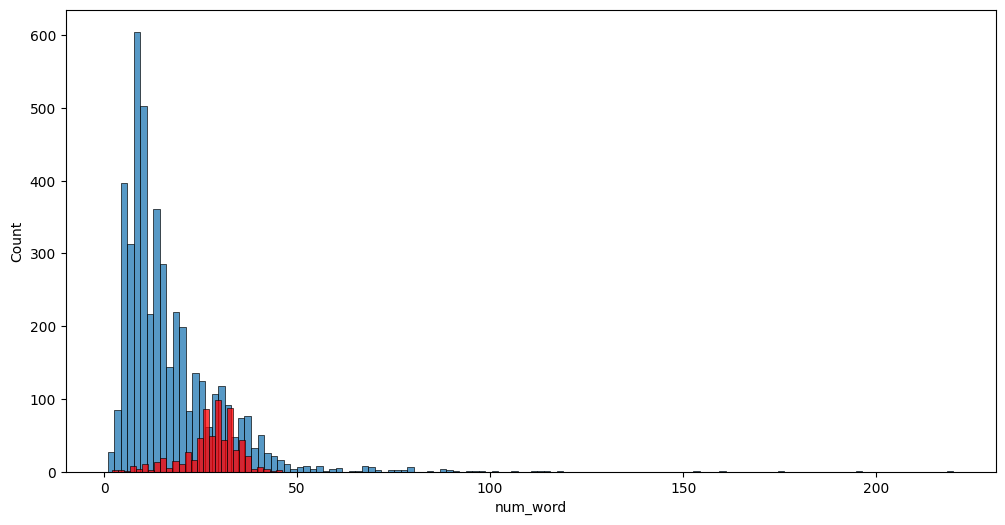

In [80]:
plt.figure(figsize=(12,6))
sn.histplot(df[df['target']==0]['num_word'])
sn.histplot(df[df['target']==1]['num_word'],color='red')

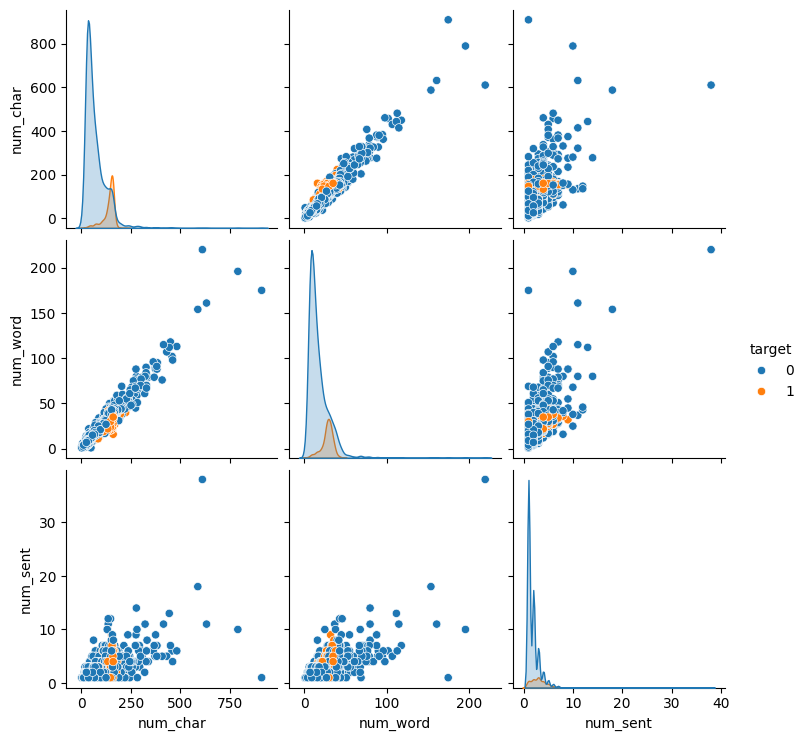

In [82]:
sn.pairplot(df,hue='target')

<Axes: >

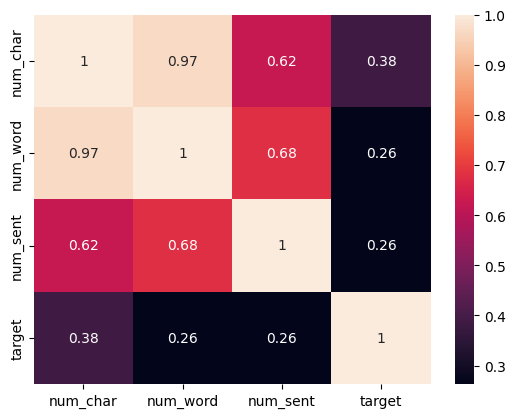

In [87]:
sn.heatmap(df[['num_char','num_word','num_sent','target']].corr(),annot=True)

In [103]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [104]:
def transform_text(text):
    text = text.lower()  # Step 1: Lowercase
    text = nltk.word_tokenize(text)  # Step 2: Tokenize
    y = []
    for i in text:
        if i.isalnum():  # Step 3: Keep only alphanumeric tokens (no punctuation or symbols)
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        # Step 4: Remove stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
      y.append(ps.stem(i))
    return " ".join(y)


In [106]:
transform_text('hi how are you 20% $$ dancing')

'hi 20 danc'

In [107]:
df['transformed_text'] = df['text'].apply(transform_text)

In [108]:
df.head()

,target,text,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
